# Introduction to Scikit-Learn (Sklearn)

This notebook demonistrates some of the most useful functions of the most beautiful scikit-learn library.

What we are going to cover:

0. An end-to-end scikit-learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!


## 0. An end-to-end scikit-learn workflow

In [1]:
# 1. Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [2]:
# Create X (Features matrix)
X= heart_disease.drop("target", axis=1)

# Create Y (labels)
Y = heart_disease["target"]

In [3]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

In [5]:
clf.fit(X_train, Y_train);

In [6]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1


In [7]:
Y_train

0    1
1    1
5    1
Name: target, dtype: int64

In [8]:
# Make a prediction 
Y_label = clf.predict(np.array([0, 2, 3, 4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [9]:
Y_preds = clf.predict(X_test)
Y_preds

array([1, 1, 1], dtype=int64)

In [10]:
Y_test

3    1
2    1
4    1
Name: target, dtype: int64

In [11]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [12]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, Y_train)

1.0

In [13]:
clf.score(X_test, Y_test)

1.0

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [15]:
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [16]:
confusion_matrix(Y_test, Y_preds)

array([[3]], dtype=int64)

In [17]:
print(accuracy_score(Y_test, Y_preds))

1.0


In [18]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test)* 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 100.00%

Trying model with 20 estimators...
Model accuracy on test set: 100.00%

Trying model with 30 estimators...
Model accuracy on test set: 100.00%

Trying model with 40 estimators...
Model accuracy on test set: 100.00%

Trying model with 50 estimators...
Model accuracy on test set: 100.00%

Trying model with 60 estimators...
Model accuracy on test set: 100.00%

Trying model with 70 estimators...
Model accuracy on test set: 100.00%

Trying model with 80 estimators...
Model accuracy on test set: 100.00%

Trying model with 90 estimators...
Model accuracy on test set: 100.00%



In [19]:
# Save a model and load it
import pickle 
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [20]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, Y_test)

1.0

In [21]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\hamip\Documents\sample_project_1\env\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
          pip: 20.3.3
   setuptools: 52.0.0.post20210125
      sklearn: 0.23.2
        numpy: 1.19.2
        scipy: 1.6.0
       Cython: None
       pandas: 1.2.1
   matplotlib: 3.3.4
       joblib: 1.0.0
threadpoolctl: 2.1.0

Built with OpenMP: True


## 1. Getting our data ready to be used with machine learning
    Three main things we have to do:
        1. Split the data into features and labels (usually 'X' & 'Y')
        2. Filling (also called imputing) or disregarding missing values
        3. Converting non-numerical values to numerical values (also called feature encoding)

In [22]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [23]:
X = heart_disease.drop("target", axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1


In [24]:
Y = heart_disease["target"]
Y

0    1
1    1
2    1
3    1
4    1
5    1
Name: target, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [26]:
X_test.shape, X_train.shape, Y_test.shape, Y_train.shape

((2, 13), (4, 13), (2,), (4,))

## Converting data to numbers
* Make sure it's all numerical

In [27]:
import pandas as pd
car_sales = pd.read_csv("car-sales.csv")

In [28]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,254888,4,"$5,000.00"
2,Toyota,Blue,54585,3,"$7,000.00"
3,BMW,Black,656648,5,"$22,000.00"
4,Nissan,White,68510,4,"$3,500.00"
5,Toyota,Green,248751,4,"$4,500.00"
6,Honda,Blue,365987,4,"$5,000.00"
7,Honda,Blue,12457,4,"$4,500.00"
8,Toyota,White,254985,4,"$3,200.00"
9,Nissan,White,241000,4,"$2,000.00"


In [29]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

### Before we can run a machine learning model we have to convert objects into numbers(numerical data)

In [30]:
# Split into X/Y
X = car_sales.drop("Price", axis=1)
Y = car_sales["Price"]

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [31]:
# Build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
# Converting data(categories) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder= "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

In [32]:
# Putting it into a DataFrame
pd.DataFrame(transformed_X)

NameError: name 'transformed_X' is not defined

In [33]:
# Another way to convert data into numbers is
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,0,0,1,0,0,0,0,1
1,4,0,1,0,0,0,0,0,1,0
2,3,0,0,0,1,0,1,0,0,0
3,5,1,0,0,0,1,0,0,0,0
4,4,0,0,1,0,0,0,0,0,1
5,4,0,0,0,1,0,0,1,0,0
6,4,0,1,0,0,0,1,0,0,0
7,4,0,1,0,0,0,1,0,0,0
8,4,0,0,0,1,0,0,0,0,1
9,4,0,0,1,0,0,0,0,0,1


In [34]:
# Let's refit the model
import numpy as np
from sklearn.model_selection import train_test_split
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '');
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

<ipython-input-34-4a2c3ae46100>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '');


NameError: name 'transformed_X' is not defined

### What if there were missing values?

1. Fill the missing data with some value (also known as imputation)
2. Remove the samples with missing data altogether.

In [35]:
# Import car sales missing data
car_sales_missing = pd.read_csv("car-sales-missing.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043.0,4.0,"4,000.00"
1,Honda,Red,254888.0,4.0,"5,000.00"
2,Toyota,Blue,54585.0,3.0,NaN
3,BMW,NaN,656648.0,5.0,"22,000.00"
4,Nissan,White,68510.0,4.0,"3,500.00"
5,Toyota,Green,NaN,NaN,"4,500.00"
6,Honda,Blue,365987.0,4.0,"5,000.00"
7,Honda,NaN,12457.0,4.0,"4,500.00"
8,Toyota,White,254985.0,4.0,"3,200.00"
9,NaN,White,241000.0,4.0,"2,000.00"


In [36]:
car_sales_missing.isna().sum()

Make             1
Colour           2
Odometer (KM)    1
Doors            1
Price            1
dtype: int64

In [37]:
# Create X and Y
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

In [38]:
# Let's try and convert our data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder = "passthrough")
transformer_X = transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

### Option 1: Fill missing data with Pandas

In [39]:
# Fill the 'Make' column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the 'Colour' column 
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the 'Odometer' column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the 'Doors' column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [40]:
# Checkout DataFrame again
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            1
dtype: int64

In [41]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [42]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [43]:
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

In [44]:
# Let's try again and convert the data to numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.50043000e+05],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        2.54888000e+05],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        6.56648000e+05],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        6.85100000e+04],
       [0.00000000e+00, 0.00000000e+

### Option 2: Fill missing values with Scikit-Learn

In [45]:
car_sales_missing = pd.read_csv("car-sales-missing.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043.0,4.0,"4,000.00"
1,Honda,Red,254888.0,4.0,"5,000.00"
2,Toyota,Blue,54585.0,3.0,NaN
3,BMW,NaN,656648.0,5.0,"22,000.00"
4,Nissan,White,68510.0,4.0,"3,500.00"
5,Toyota,Green,NaN,NaN,"4,500.00"
6,Honda,Blue,365987.0,4.0,"5,000.00"
7,Honda,NaN,12457.0,4.0,"4,500.00"
8,Toyota,White,254985.0,4.0,"3,200.00"
9,NaN,White,241000.0,4.0,"2,000.00"


In [46]:
car_sales_missing.isna().sum()

Make             1
Colour           2
Odometer (KM)    1
Doors            1
Price            1
dtype: int64

In [47]:

# Drop the rows with no labels
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing

<ipython-input-47-a1815ac1c9e8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043.0,4.0,"4,000.00"
1,Honda,Red,254888.0,4.0,"5,000.00"
3,BMW,NaN,656648.0,5.0,"22,000.00"
4,Nissan,White,68510.0,4.0,"3,500.00"
5,Toyota,Green,NaN,NaN,"4,500.00"
6,Honda,Blue,365987.0,4.0,"5,000.00"
7,Honda,NaN,12457.0,4.0,"4,500.00"
8,Toyota,White,254985.0,4.0,"3,200.00"
9,NaN,White,241000.0,4.0,"2,000.00"


In [48]:
car_sales_missing.isna().sum()

Make             1
Colour           2
Odometer (KM)    1
Doors            1
Price            0
dtype: int64

In [49]:
# Split into X & Y
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

In [50]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean 
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (Something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Toyota', 'White', 4.0, 150043.0],
       ['Honda', 'Red', 4.0, 254888.0],
       ['BMW', 'missing', 5.0, 656648.0],
       ['Nissan', 'White', 4.0, 68510.0],
       ['Toyota', 'Green', 4.0, 250564.75],
       ['Honda', 'Blue', 4.0, 365987.0],
       ['Honda', 'missing', 4.0, 12457.0],
       ['Toyota', 'White', 4.0, 254985.0],
       ['missing', 'White', 4.0, 241000.0]], dtype=object)

In [51]:
car_sales_filled = pd.DataFrame(filled_X, 
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Toyota,White,4.0,150043.0
1,Honda,Red,4.0,254888.0
2,BMW,missing,5.0,656648.0
3,Nissan,White,4.0,68510.0
4,Toyota,Green,4.0,250564.75


In [52]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [53]:
# Let's try again and convert our data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

array([[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,
        150043.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,
        254888.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,
        656648.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,
        68510.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        250564.75],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        365987.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,
        12457.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,
        254985.0],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,
        241000.0]], dtype=object)

In [54]:
# Now we have got our data as numbers and filled (no missing values)
# Let's fit a model
car_sales_missing["Price"] = car_sales_missing["Price"].str.replace('[\$\,\.]', '')
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(transformed_X,
                                                    Y)
model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

<ipython-input-54-cb8acd6b1440>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales_missing["Price"] = car_sales_missing["Price"].str.replace('[\$\,\.]', '')


0.7592476851851852

### Choosing the right estimator/algorithm for our problem
    Scikit-Learn uses estimator as another name for machine learning model or algorithm
    * Classification - predicting whether a sample is one thing or another
    * Regression - predicting a number

### Picking a machine learning model for a regression problem

In [55]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [56]:
import pandas as pd
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [57]:
# How many samples
len(boston_df)

506

In [58]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import numpy as np
# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate the Ridge model
model = Ridge()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.6662221670168522


### How do we improve this score?

What if Ridge wasn't working?

Let's refer back to the maps
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [59]:
# Let's try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup a random seed
np.random.seed(42)
rf.score(X_test, Y_test)

NameError: name 'rf' is not defined

## Choosing an Estimator for a Classification problem

Let's go to the map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Tidbit:
        1. If you have structured data, use ensemble methods 
        2. If you have unstructured data, use deep learning or transfer learning

## Make predictions using a machine learning model

2 ways to make predictions:
1. predict()
2. predict_proba()

In [60]:
# Use a trained model to make predictions
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [61]:
np.array(Y_preds)

array([1, 1, 1], dtype=int64)

### Make predictions with predict_proba()

In [62]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [63]:
# Let's predict on the same data
clf.predict(X_test[:5])

array([1, 1, 1, 1, 1], dtype=int64)

### 'predict()' can also be use for regression models

In [64]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [65]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

# fit the model
model.fit(X_train, Y_train)

# Make predictions
Y_preds = model.predict(X_test)

In [66]:
Y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [67]:
np.array(Y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [68]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_test, Y_preds)

2.136382352941176

## Evaluating a Machine Learning Model
    Three ways of doing 
    1. score method,
    2. scoring parameter, &
    3. 

### Evaluating a model using the scoring parameter

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed()

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, Y_train);

In [70]:
clf.score(X_test, Y_test)

1.0

In [71]:
cross_val_score(clf, X, Y)

array([1., 1., 1., 1., 1.])

### Classification model evaluation matrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
3. Classificcation report

In [72]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, Y)


In [74]:
np.mean(cross_val_score)

1.0

In [75]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}")

Heart Disease Classifier Cross-Validated Accuracy: 100.00


### **Area under the receiver operating characteristic curve (AUC/ROC)**
* Area Under Curve (AUC), or
* ROC Curve

  ROC curves are a comparison  of a model's true positive rate (tpr) versus a models false positive rate (fpr).
        True Positive = model predicts 1 when the truth is 1
        False Positive = model predicts 1 when the truth is 0
        True Negative = model predicts 0 when the truth is 0
        False Negative = model predicts 0 when the truth is 1

In [76]:
# Create X_test.... etc

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [77]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, Y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs

array([[1.],
       [1.]])

In [78]:
y_probs_positive = y_probs[:, 0]
y_probs_positive

array([1., 1.])

In [79]:
# Calcculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_probs_positive)

# Chech the true positive rate 
tpr

C:\Users\hamip\Documents\sample_project_1\env\lib\site-packages\sklearn\metrics\_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "


array([0., 1.])

In [80]:
thresholds

array([2., 1.])

In [81]:
fpr

array([nan, nan])

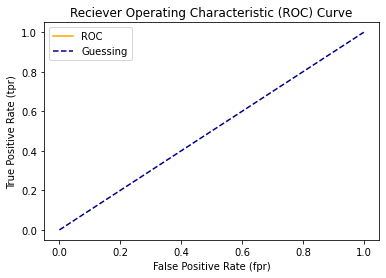

In [82]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate 
    and true positive rate of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color= "darkblue", linestyle= "--", label= "Guessing")
    
    # Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Reciever Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

### Confusion Matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it wass supposed to predict.
In essence, giving you an idea of where the model is getting confused.

In [83]:
from sklearn.metrics import confusion_matrix
Y_preds = clf.predict(X_test)

confusion_matrix(Y_test, Y_preds)
    

array([[2]], dtype=int64)

In [84]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(Y_test,
            Y_preds,
            rownames=["Actual labels"],
            colnames=["Predicted labels"])

Predicted labels,1
Actual labels,
1,2


In [ ]:
# How to install a conda package into the current environment from a jupyter notebook

import sys
!conda install --yes --prefix {sys.prefix} seaborn

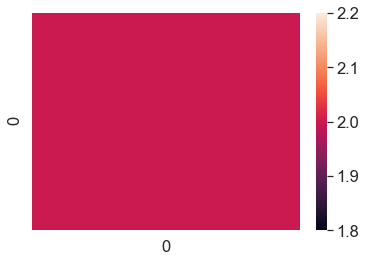

In [85]:
# Make our Confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

# Set the font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(Y_test, Y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat);

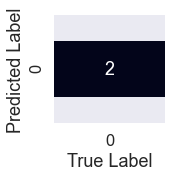

In [86]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(2, 2))
    ax = sns.heatmap(conf_mat,
                     annot=True,  # Annotate the boxes with conf_mat info 
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label");
    
    # Fix the broken annotations (This happened in matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
    
    
plot_conf_mat(conf_mat)

### **Classification Report**

In [87]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_preds))

NameError: name 'y_preds' is not defined

In [88]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #Only one positive case

disease_preds = np.zeros(10000)  # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                    disease_preds,
                                    output_dict=True))

C:\Users\hamip\Documents\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## To summarize classification matrix
    * **Accuracy** : is a good measure to start with if all classes are balanced (e.g., same amount of samples which are labelled with 0 or 1)
    * **Precision** and **Recall** become more important when classes are imbalanced.
    * If false positive predictions are worse than false negatives, ami for higher precision.
    * If false negative predictions are worse than false positives, aim for higher recall.
    * **F1-Score** is a combination of precision and recall.

### Regression model evaluation metrics

1. R^2 (pronunced r-square) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean square error (MSE)

**R^2**

    What R^2 does: Compares your models predictions to the mean of the targets. Value can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers, it's R^2 value would be 1.

In [89]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, Y_train);


In [90]:
model.score(X_test, Y_test)

0.8654448653350507

In [91]:
from sklearn.metrics import r2_score

# Fill an array with Y_test mean
Y_test_mean = np.full(len(Y_test), Y_test.mean())

In [92]:
Y_test.mean()

21.488235294117644

In [93]:
r2_score(Y_test, Y_test_mean)

0.0

In [94]:
r2_score(Y_test, Y_test)

1.0

### **Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are. 

In [95]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(Y_test, y_preds)
mae

2.136382352941176

In [96]:
df = pd.DataFrame(data={"actual values":Y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


### **Mean squared error (MSE)**

In [97]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(Y_test, y_preds)
mse

9.867437068627442

In [98]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared

173     0.269361
274     3.334276
491     9.979281
72      0.435600
452     0.628849
         ...    
412    22.477081
436     8.271376
411    12.873744
86      5.267025
75      5.914624
Name: differences, Length: 102, dtype: float64

In [99]:
squared.mean()

9.867437068627442

### Finally using the 'scoring' parameter

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble  import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

clf = RandomForestClassifier()


In [101]:
# 1. Default scoring parameter is none
np.random.seed(42)
cv_acc = cross_val_score(clf, X, Y, cv=5, scoring=None)
cv_acc

array([1., 1., 1., 1., 1.])

In [102]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100: .2f}%")

The cross-validated accuracy is:  100.00%


In [103]:
#2. Accuracy
np.random.seed(42)
cv_acc = cross_val_score(clf, X, Y, cv=5, scoring="accuracy")
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100: .2f}%')

The cross-validated accuracy is:  100.00%


In [104]:
#3. Precision
cv_precision = cross_val_score(clf, X, Y, cv=5, scoring="precision")
cv_precision

array([1., 1., 1., 1., 1.])

In [105]:
np.mean(cv_precision)

1.0

In [106]:
# 4. Recall
cv_recall = cross_val_score(clf, X, Y, cv=5, scoring="recall")
cv_recall

array([1., 1., 1., 1., 1.])

In [107]:
np.mean(cv_recall)

1.0

In [108]:
# 5. f1
cv_f1 = cross_val_score(clf, X, Y, cv=5, scoring="f1")
cv_f1

array([1., 1., 1., 1., 1.])

In [109]:
np.mean(cv_f1)

1.0

### How about regression model

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = boston_df.drop("target", axis=1)
Y = boston_df["target"]
model = RandomForestRegressor()


In [111]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, Y, cv=5, scoring=None)
np.mean(cv_r2)

0.6243870737930857

In [112]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, Y, cv=5, scoring="r2")
np.mean(cv_r2)

0.6243870737930857

In [113]:
# Mean absolute error
np.random.seed(42)
cv_mae = cross_val_score(model, X, Y, cv=5, scoring="neg_mean_absolute_error")   # All scorer objects follow the convention that higher values are better  than the lower return values. Thus metrics which measure the distance between the model and the data, like metrics.mean_absolute_error , are available as neg_mean_absolute_error which returns the negative value of the metric.
np.mean(cv_mae)

-3.0312352552902335

In [114]:
# Mean squared error
np.random.seed(42)
cv_mse = cross_val_score(model, X, Y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.261442856882137

### Using different evaluation as Scikit-Learn functions

**Classification evaluation functions**

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(Y_test, y_preds)*100: .2f}%")
print(f"Precision: {precision_score(Y_test, y_preds)}")
print(f"Recall: {recall_score(Y_test, y_preds)}")
print(f"F1: {f1_score(Y_test, y_preds)}")

Classifier metrics on the test set
Accuracy:  100.00%
Precision: 1.0
Recall: 1.0
F1: 1.0


### Regression evaluation functions

In [116]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, Y_train)

# Make some predictions
y_preds = model.predict(X_test)

# Evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(Y_test, y_preds)}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, y_preds)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, y_preds)}")

Regression model metrics on the test set
R^2: 0.8654448653350507
Mean Absolute Error: 2.136382352941176
Mean Squared Error: 9.867437068627442


## Improving a model
First predictions = baseline predictions.
First model = baseline model

**From a data perspective:**

    * Could we collect more data? (generally, the more data, the better)
    * Could we improve our data?

**From a model perspective:**

    * Is there a better model we could use?
    * Could we improve our model?
    
**Hyperparameters vs. Parameters**

    * Parameters = model find these patterns in data
    * Hyperparameters = setting on a model you can adjust to (potentially) improve its ability to find patterns.
    
**Three ways to adjust hyperparameters:**
    
    1. By hand 
    2. Randomly with RandomSearchCV
    3. Exhaustively with GridSearchCV

In [117]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [118]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Tuning hyperparameters

Let's make 3 sets, training, validation and test.

In [119]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### We're absgoing to try and adjust
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [120]:
def evaluate_preds(Y_true, y_preds):
    """
    Performs evaluation comparison on Y_true labels vs. y_preds labels on a classification.
    """
    accuracy = accuracy_score(Y_true, y_preds)
    precision = precision_score(Y_true, y_preds)
    recall = recall_score(Y_true, y_preds)
    f1 = f1_score(Y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100: .2f}%")
    print(f"Precision: {precision: .2f}")
    print(f"Recall: {recall: .2f}")
    print(f"F1 score: {f1: .2f}")
    
    return metric_dict

In [121]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data 
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & Y
X = heart_disease_shuffled.drop("target", axis=1)
Y = heart_disease_shuffled["target"]

# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled))  # 70% of the data 
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data 
X_train, Y_train = X[:train_split], Y[:train_split]
X_valid, Y_valid = X[train_split:valid_split], Y[train_split:valid_split]
X_test, Y_test = X[valid_split:], Y[valid_split:]

clf = RandomForestClassifier(max_depth= 10)
clf.fit(X_train, Y_train)
                    
# Make baseline predictions
y_preds = clf.predict(X_valid)
                    
# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(Y_valid, y_preds)
baseline_metrics

Acc:  100.00%
Precision:  1.00
Recall:  1.00
F1 score:  1.00


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

### Hyperparameter tuning using RandomizedSearchCV (CV: Cross-Validation)

In [134]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}
np.random.seed(42)

# Split into X & Y
X = heart_disease_shuffled.drop("target", axis=1)
Y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions = grid,
                            n_iter = 2,   # Number of models to try
                            cv = 2,
                            verbose = 2)
# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, Y_train);

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, total=   0.8s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, total=   0.8s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.5s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s finished


In [135]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

In [136]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(Y_test, rs_y_preds)

Acc:  100.00%
Precision:  1.00
Recall:  1.00
F1 score:  1.00


### Hyperparameter tuning with GridSearchCV

In [137]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [138]:
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [140]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & Y
X = heart_disease_shuffled.drop("target", axis=1)
Y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator = clf,
                            param_grid = grid_2,
                            cv = 2,
                            verbose = 2)
# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, Y_train);

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   1.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.8s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   2.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   2.3s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   27.7s finished


In [141]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [142]:
# Make predictions with the best hyperparameters
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(Y_test, gs_y_preds)

Acc:  100.00%
Precision:  1.00
Recall:  1.00
F1 score:  1.00


Let's compare our different models

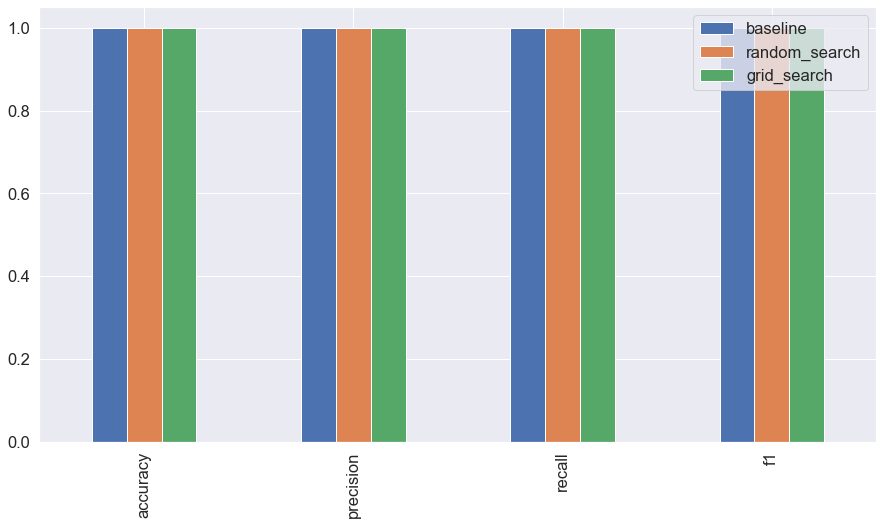

In [147]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               
                                "random_search": rs_metrics,
                                "grid_search": gs_metrics})
compare_metrics.plot.bar(figsize=(15, 8));

# Saving and loading trained machine learning models
Two ways to save and load machine learning model
1. with python's `pickle` module
2. with the `joblib` module

**Pickle**

In [152]:
import pickle

# Saving an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [153]:
# Load a saved model

loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [155]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(Y_test, pickle_y_preds)

Acc:  100.00%
Precision:  1.00
Recall:  1.00
F1 score:  1.00


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

**Joblib**

In [157]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib");

In [159]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [161]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(Y_test, joblib_y_preds)

Acc:  100.00%
Precision:  1.00
Recall:  1.00
F1 score:  1.00


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}